In [15]:
import os

download_name = "wiki.train.tokens.bz2"
if not os.path.exists(download_name):
    import requests
    response = requests.get(f"https://raw.githubusercontent.com/bzitko/nlp_repo/main/assignments/a01/{download_name}")
    with open(download_name, "wb") as fp:
        fp.write(response.content)
    response.close()
    
name = "wiki.train.tokens"
if not os.path.exists(name):
    import bz2
    with open(download_name, 'rb') as bzf, open(name, 'wb') as fp:
        fp.write(bz2.decompress(bzf.read()))    

In [16]:
import matplotlib.pyplot as plt
from collections import Counter

# 1. Read data

Filename "wiki.train.tokens" contains token-prepared text from Wikipedia.  
Store the content of the file into variable `wikitext`.
Print first 100 chars.

In [17]:
with open('wiki.train.tokens', encoding="utf8") as fp:
    wikitext = fp.read()

wikitext[:100]

' \n = Valkyria Chronicles III = \n \n Senjō no Valkyria 3 : <unk> Chronicles ( Japanese : 戦場のヴァルキュリア3 ,'

# 2. Tokenization

Create function *tokenize* which: 
* for a given text  
* returns list of tokens which are separated by the whitespace chars

Print first 10 tokens from `wikitext`.

In [18]:
def tokenize(text):
    return text.strip().split()

tokenize(wikitext)[:10]

['=',
 'Valkyria',
 'Chronicles',
 'III',
 '=',
 'Senjō',
 'no',
 'Valkyria',
 '3',
 ':']

# 3. Heaps' law

Empirical law.

* $N$ = number of tokens
* $V$ = vocabulary size

$V = k N^{\beta}$ where:
* $k$ is between 10 and 100
* $\beta$ is between 0.4 and 0.6

First determine and print $N$ and $V$, then for each $k$ between 10 and 100 with step 10 print $k$ and corresponding $\beta$.


In [19]:
N = sum(1 for t in tokenize(wikitext))
V = len(set(tokenize(wikitext)))


print(f"N={N}, V={V}\n")

import math

for k in range(10, 101, 10):
    beta = (math.log(V) - math.log(k)) / math.log(N)
    print(f"k={k}, beta = {beta:.3f}")

N=2051910, V=33277

k=10, beta = 0.558
k=20, beta = 0.510
k=30, beta = 0.482
k=40, beta = 0.463
k=50, beta = 0.447
k=60, beta = 0.435
k=70, beta = 0.424
k=80, beta = 0.415
k=90, beta = 0.407
k=100, beta = 0.400


# 3. Word-to-index mapping

Create two dictionaries:
* w2i - that maps word to index and (index can be cummulative determined by the size of current dictionary)
* i2w - that maps index to word

In [20]:
w2i = {}
for token in tokenize(wikitext):
    if token not in w2i:
        w2i[token] = len(w2i) 
        
        
i2w = {i: w for w, i in w2i.items()}

assert i2w[w2i["language"]] == "language"


# 4. Word counter

`Counter` class from `collections` module can be used  for counting frequencies of words  
`from collections import Counter`

In [21]:
from collections import Counter

counter = Counter(tokenize(wikitext)) 

Print 10 most common words.

In [22]:
counter.most_common(10)

[('the', 113161),
 (',', 99913),
 ('.', 73388),
 ('of', 56889),
 ('<unk>', 54625),
 ('and', 50603),
 ('in', 39453),
 ('to', 39190),
 ('a', 34237),
 ('=', 29570)]

Print 10 least common words.

In [23]:
counter.most_common()[-10:]

[('Chant', 3),
 ('Kreutzer', 3),
 ('Forrester', 3),
 ('Zoromski', 3),
 ('roundabouts', 3),
 ('Tuscola', 3),
 ('northeasterly', 3),
 ('intergrades', 3),
 ('Nests', 3),
 ('gallinae', 3)]

###  Relation between frequencies 

Make plot where:
* x axis represents words sorted by their frequency (descending)
* y axis are word frequencies (in log scale)

For example,  
token "the" has frequency 113161 and is the first x value,  
token "," has frequency 99913 and is the second x value,  
...  
token "gallinae" has frequency 3 and is the last x value.



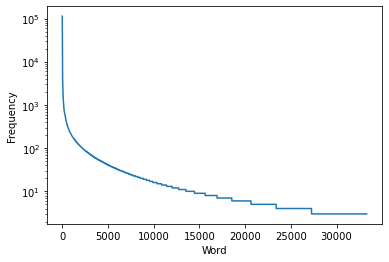

In [24]:
freqs = sorted(counter.values(), reverse=True)
plt.xlabel("Word")
plt.yscale("log")
plt.ylabel("Frequency")
plt.plot(range(len(freqs)), freqs)
plt.show()


# 5. Zipf's law

Empirical law:
* r - rank of the word (word with the largest frequency has rank 1)
* f - frequency of the word

$f \propto \frac{1}{r}$ 

Make plot where:
* x axis represents words sorted by frequencies (use log scale for this axis) and
* y axis are frequencies (use log scale for this axis)

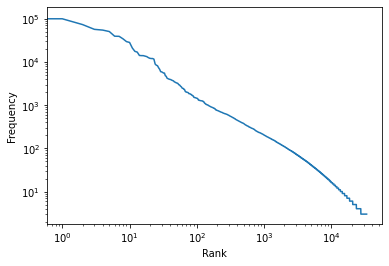

In [25]:
words, counts = zip(*counter.most_common())

plt.xscale('log')
plt.xlabel('Rank')
plt.yscale('log')
plt.ylabel('Frequency')
plt.plot(range(len(words)), counts)
plt.show() 